In [1]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn import metrics
from math import sqrt

In [2]:
# Jupyter Notebook 환경 설정하기
%matplotlib inline
warnings.filterwarnings('ignore')

# seaborn 환경 설정하기
sns.set_palette("GnBu_d")
sns.set_style("whitegrid")

In [3]:
# 데이터 얻기
customers = pd.read_excel("EcommerceCustomers.csv.xlsx")

In [4]:
# EcommerceCustomers.csv 정보 출력해보기
print("[ info ]")
customers.info()
print("="*50)

print("[ describe ]")
print(customers.describe())
print("="*50)

print("[ head ]")
print(customers.head())
print("="*50)

[ info ]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
[ describe ]
       Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%        

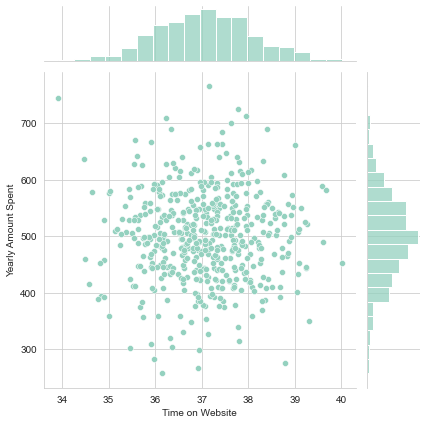

In [5]:
# 데이터 분석하기

# searborn jointPlot 산포도 + 히스토그램 그래프
# Time on Website, Yearly Amount Spent
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

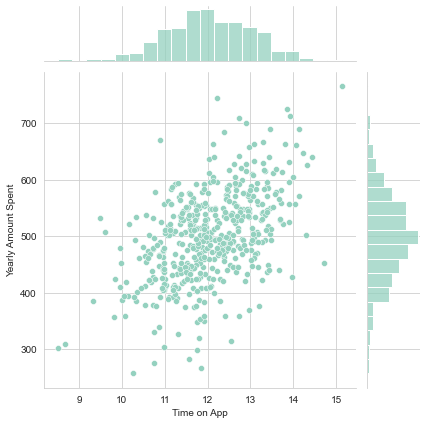

In [6]:
# Time on App, Yearly Amount Spent
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)

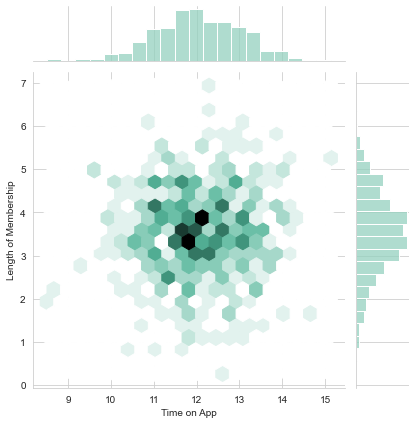

In [7]:
# Time on App, Length of Membership
sns.jointplot(x='Time on App', y='Length of Membership', data=customers, kind='hex')

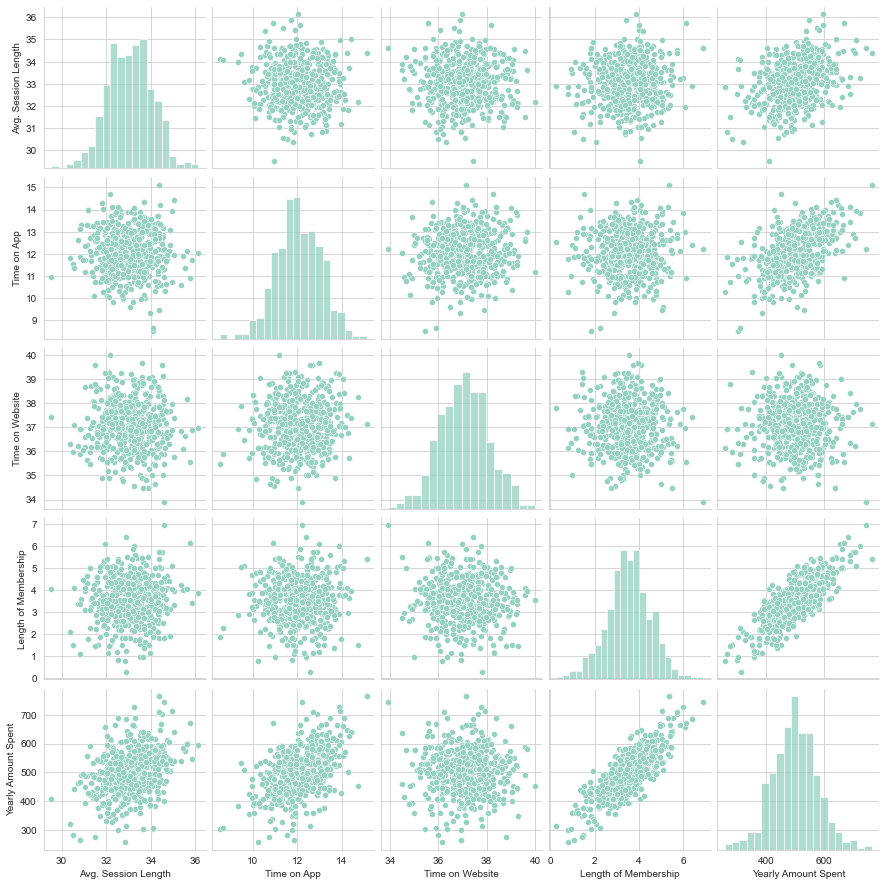

In [8]:
# seaborn pairplot costomers
sns.pairplot(customers)

<AxesSubplot:>

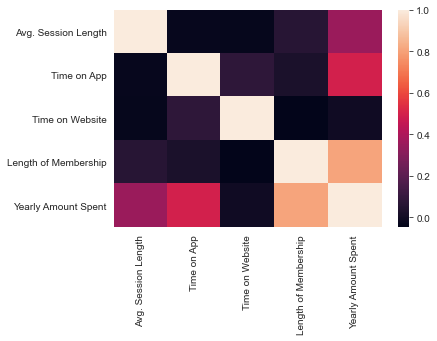

In [9]:
# seaborn heatmap
sns.heatmap(customers.corr())

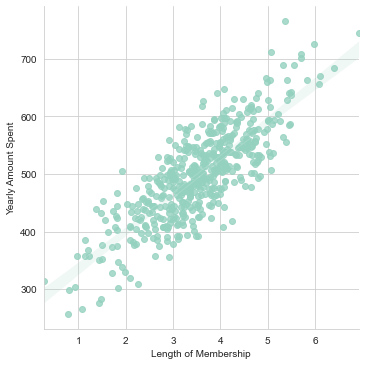

In [10]:
# seaborn lmplot 함수로 Length of Memebership, Yearly Amount Spent 선형 관계 확인하기
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

In [11]:
# 데이터 추출하기
x = customers[['Avg. Session Length',	'Time on App', 'Time on Website', 'Length of Membership']]

y = customers['Yearly Amount Spent']

print(x.head())
print("="*50)

print(y.head())
print("="*50)

   Avg. Session Length  Time on App  Time on Website  Length of Membership
0            34.497268    12.655651        39.577668              4.082621
1            31.926272    11.109461        37.268959              2.664034
2            33.000915    11.330278        37.110597              4.104543
3            34.305557    13.717514        36.721283              3.120179
4            33.330673    12.795189        37.536653              4.446308
0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64


In [12]:
# 훈련 데이터, 레이블 데이터, 테스트 데이터 추출하기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

print("x_train shape : {}" .format(x_train.shape))
print("x_test shape : {}" .format(x_test.shape))
print("y_train shape : {}" .format(y_train.shape))
print("y_test shape : {}" .format(y_test.shape))

x_train shape : (350, 4)
x_test shape : (150, 4)
y_train shape : (350,)
y_test shape : (150,)


In [13]:
# 모델 훈련하기
lm = LinearRegression()
lm.fit(x_train, y_train)

df_coef = pd.DataFrame(lm.coef_, columns=["Coefficient"], index=['Avg. Session Length',	'Time on App', 'Time on Website', 'Length of Membership'])

print(df_coef)

                      Coefficient
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097


Text(0, 0.5, 'Predicted Y')

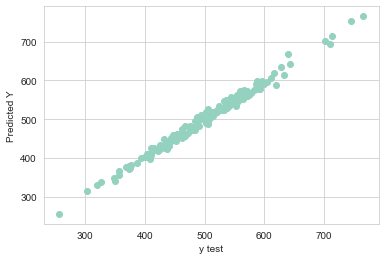

In [14]:
# 테스트 데이터 평가하기
predictions = lm.predict(x_test)

# 산포도 출력하기
plt.scatter(x=y_test, y=predictions)
plt.xlabel('y test')
plt.ylabel('Predicted Y')

In [15]:
# MAE(Mean Absolute Error), MSE(Mean Squared Error), RMSE(Root MSE) 계산하기
print('MAE:', 
      metrics.mean_absolute_error(y_test, predictions), ' ',
      (1./len(y_test))*(sum(abs(y_test-predictions))))
print('MSE:', 
      metrics.mean_squared_error(y_test, predictions), ' ',
      (1./len(y_test))*(sum((y_test-predictions)**2)))
print('RMSE:', 
      np.sqrt(metrics.mean_squared_error(y_test, predictions)), ' ',
      sqrt((1./len(y_test))*(sum((y_test-predictions)**2))))

MAE: 7.228148653430969   7.228148653430969
MSE: 79.81305165097615   79.81305165097615
RMSE: 8.93381506697873   8.93381506697873


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

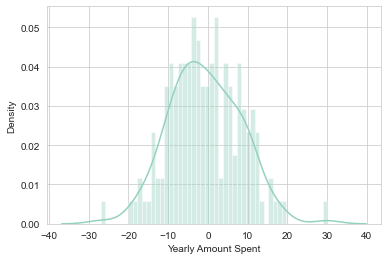

In [16]:
# 히스토그램
sns.distplot((y_test-predictions), bins=50)

In [17]:
# 결론
# Time on Website는 Yearly Amount Spent 에 거의 영향을 주지 않는다.
# Time on App은 Yearly Amount Spent와 밀접한 관계가 있다.
print(df_coef)

                      Coefficient
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097
